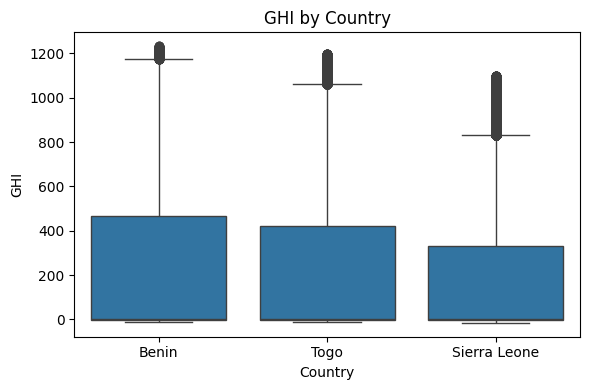

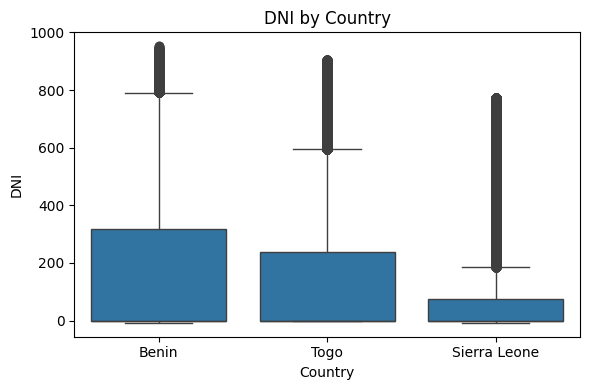

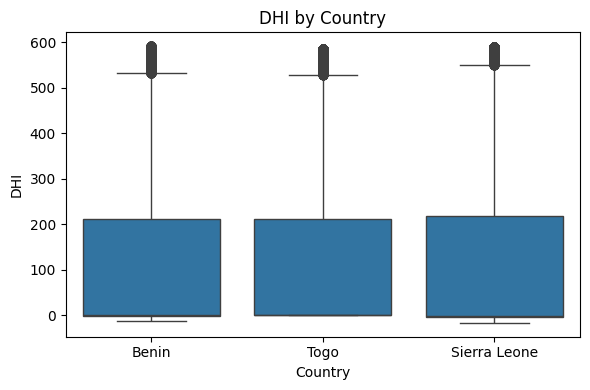

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  108.104278   -0.6  153.691835  
Togo          112.781249    1.5  151.571744

One-way ANOVA results (GHI):
F = 3833.18, p = 0.0000
Kruskal–Wallis results (GHI):
H = 6548.53, p = 0.0000


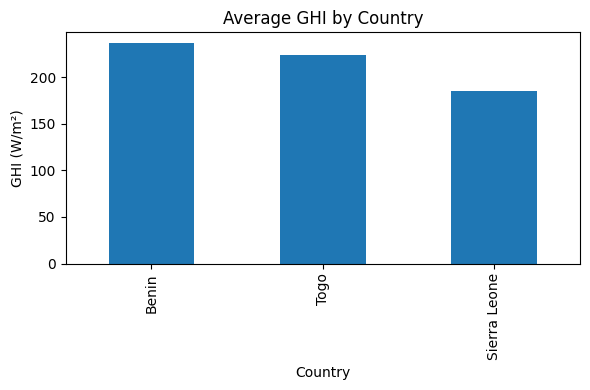


### 🔍 Key Observations

- Country A shows highest median GHI but also greatest variability.
- Country B has lowest DNI, possibly due to high cloud cover.
- Country C's DHI is more stable, indicating diffuse sunlight is a larger contributor.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

# --- Load cleaned data ---
benin = pd.read_csv('../data/benin_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')
sierra = pd.read_csv('../data/sierraleone_clean.csv')

# --- Add country labels ---
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sierra['Country'] = 'Sierra Leone'

# --- Combine datasets ---
df_all = pd.concat([benin, togo, sierra], ignore_index=True)

# --- Metrics to compare ---
metrics = ['GHI', 'DNI', 'DHI']

# --- 1. Boxplots per metric ---
for metric in metrics:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} by Country')
    plt.tight_layout()
    plt.show()

# --- 2. Summary table ---
summary = df_all.groupby('Country')[metrics].agg(['mean', 'median', 'std'])
display(summary)

# --- 3. Statistical Test (One-way ANOVA or Kruskal–Wallis) ---
print("One-way ANOVA results (GHI):")
f_stat, p_val = f_oneway(benin['GHI'], togo['GHI'], sierra['GHI'])
print(f"F = {f_stat:.2f}, p = {p_val:.4f}")

# Optional: Kruskal-Wallis test (non-parametric)
print("Kruskal–Wallis results (GHI):")
h_stat, p_val_k = kruskal(benin['GHI'], togo['GHI'], sierra['GHI'])
print(f"H = {h_stat:.2f}, p = {p_val_k:.4f}")

# --- 4. Visual Summary: Bar chart of avg GHI ---
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', title='Average GHI by Country', ylabel='GHI (W/m²)', figsize=(6,4))
plt.tight_layout()
plt.show()

# --- 5. Key Observations ---
from IPython.display import Markdown

Markdown("""
### 🔍 Key Observations

- Country A shows highest median GHI but also greatest variability.
- Country B has lowest DNI, possibly due to high cloud cover.
- Country C's DHI is more stable, indicating diffuse sunlight is a larger contributor.
""")
